In [95]:
from wikipedia import WikipediaPage
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter('ignore')

In [130]:
def find_members(content):
    cmem = '== Current members =='
    bmem = '== Band members =='
    mem = '== Members =='
    if cmem in content:
        member_section = content.split(cmem)[1].split('=')[0]
    elif bmem in content:
        member_section = content.split(bmem)[1].split('=')[0]
    elif mem in content:
        member_section = content.split(mem)[1].split('=')[0]
    else:
        member_section = ''
    return member_section

def get_member_section(band):
    try:
        try:
            band_page = WikipediaPage(title=band+ ' (band)')
        except:
            try:
                band_page = WikipediaPage(title='The '+band+' (band)')
            except:
                try:
                    band_page = WikipediaPage(title='The '+band)
                except:
                    band_page = WikipediaPage(title=band)
        member_section = find_members(band_page.content)
        return member_section
    except:
        return ''

def get_member_list(band):
    member_section = get_member_section(band)
    members = [x.split('–')[0].strip() for x in member_section.split('\n') if '–' in x]
    members_clean = []
    final = 'Final line-up'
    for member in members:
        if final in member: member=member.replace(final,'')
        members_clean.append(member)
    return members_clean

def get_discog_bands(member, main_band):
    band_ident = re.compile(r'===.*===')
    try:
        page_contents = WikipediaPage(title=member).content
        discog_section = page_contents.split('== Discography ==')[1].split('\n== ')[0]
        bands_raw = re.findall(band_ident,discog_section)
        bands=[]
        for band in bands_raw:
            band = band.replace('=','').strip()
            if band.lower()[:4] == 'with':
                band = band[4:].strip()
            check_passed=True
            for check in ['/',
                          'solo',
                          'compilation',
                          'collaboration',
                          'miscellaneous',
                          'producing',
                          'producer',
                          'studio',
                          'guest']:
                if check in band.lower(): check_passed=False
            if check_passed and band != main_band:
                bands.append(band)
        return bands
    except:
        return ''
    
def get_related_bands(band):
    related = {}
    members = get_member_list(band).copy()
    if members:
        for member in members:
            related[member]=get_discog_bands(member, band)
        return related
    else:
        return 'Band not found'

In [119]:
def build_graph(band):
    band_related = get_related_bands(band)
    band_nodes = [band] + [sub_band for band_list in band_related.values() for sub_band in band_list]
    G = nx.Graph()
    G.add_nodes_from(band_nodes)
    for member, bands in band_related.items():
        for sub_band in bands:
            G.add_edge(band,sub_band,name=member)
    return G

In [133]:
def draw_graph(G):
    labels = {a:b for a,b in zip(G.nodes,[x.replace(' ','\n') for x in G.nodes])}
    fig, ax = plt.subplots(figsize=(10,10))
    nx.draw(G,
                         labels=labels,
    #                      node_size=node_sizes,
                         node_size=4000,
                         node_shape='o',width=1,
                         font_color='white',font_weight='bold',
                         ax=ax)
    plt.show();

In [136]:
def plot_related(band):
    try:
        graph = build_graph(band)
        draw_graph(graph)
    except:
        print('Not found')

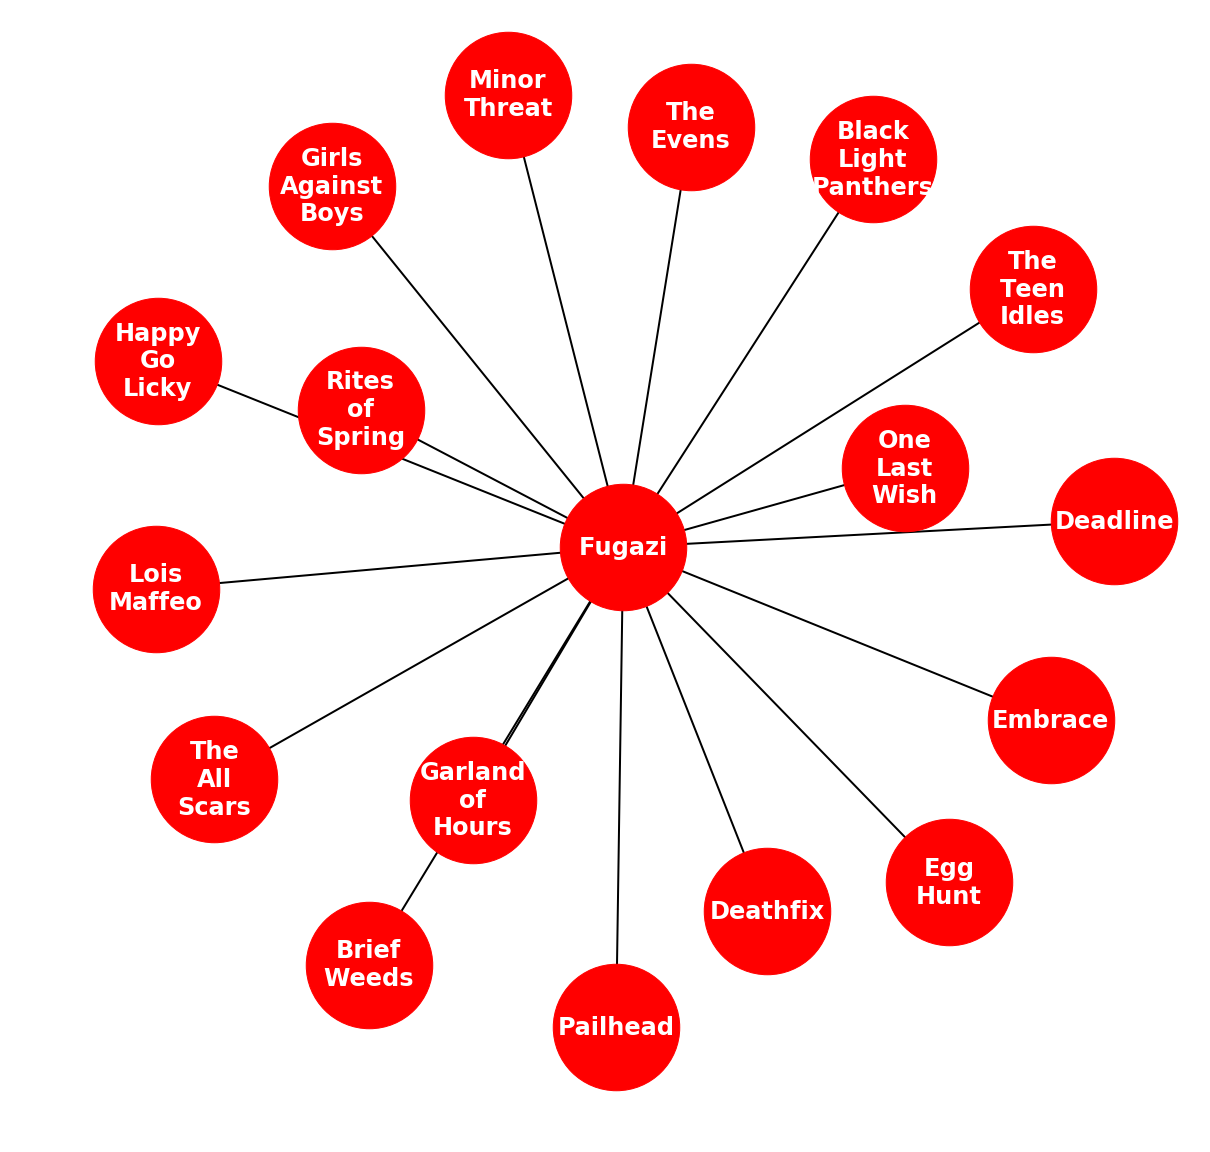

In [138]:
plot_related('Fugazi')